In [72]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


# Disease Detection


In [3]:
import tensorflow as tf 
from tensorflow.keras import models ,layers 
import matplotlib.pyplot as plt 

In [12]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [9]:
pwd


'C:\\Users\\SOUHA'

In [13]:
import os     # absolute path

directory_path = os.path.join(os.getcwd(), 'D:\\souha\\PlantVillage')

dataset=tf.keras.preprocessing.image_dataset_from_directory(
    directory_path,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 4496 files belonging to 3 classes.


In [29]:
class_names=dataset.class_names
class_names 

['Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']

In [6]:
len (dataset)

141

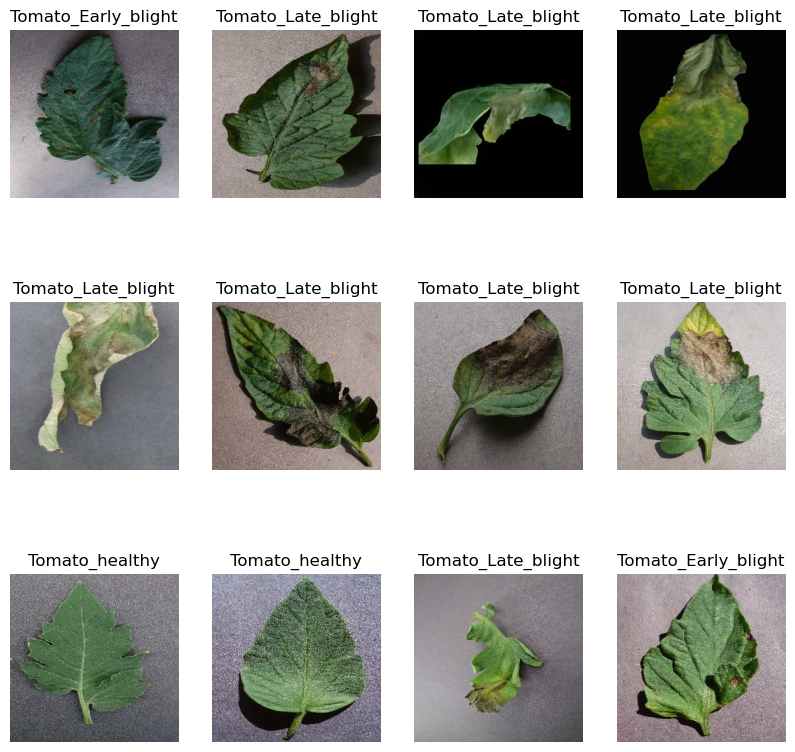

In [7]:
# pour qque les images et leurs titre  soit clair on utilise plt.fig
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
     for i in range( 12) :
       ax=plt.subplot(3,4,i+1)
       plt.imshow(image_batch[i].numpy().astype("uint8"))  
       plt.title(class_names [label_batch[i]])#on utilise astype=uint8 pour que l'image s'affiche plus clairement 
       plt.axis("off")

# Data classification 

In [8]:
train_size=0.8
len(dataset)*train_size

112.80000000000001

In [9]:
train_dataset= dataset.take(54)

In [10]:
test_dataset=dataset.skip(54)
len(test_dataset)

87

In [11]:
validation_size=0.1
len (dataset)*validation_size


14.100000000000001

In [12]:
validation_dataset=dataset.take(6)

In [33]:
test_ds=dataset.take(6)

In [14]:
def dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_buffer_size=1000):
     ds_size= len (ds)
     train_size=int(train_split*ds_size)
     validation_size=int(val_split*ds_size)
     train_dataset=ds.take(train_size)
     validation_dataset=ds.skip(train_size).take(validation_size)
     test_ds=ds.skip(train_size).skip(validation_size)
    
     return train_dataset,validation_dataset,test_ds

In [15]:
train_dataset,validation_dataset,test_ds=dataset_partitions_tf(dataset)

In [16]:
len(train_dataset)

112

In [17]:
#optimize tensorflow pipeline prefetch &catch
train_dataset=train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset=validation_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [18]:
from tensorflow.keras import layers

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

# Data augmentation

In [19]:

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),])

In [20]:
train_dataset = train_dataset.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

# Building the model 

In [29]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    resize_and_rescale,  # Assuming this is a custom or Keras preprocessing layer
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


In [30]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (None, 256, 256, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 126, 126, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

 # Compiling the model


In [31]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [32]:
history = model.fit(
    train_dataset,
    batch_size=BATCH_SIZE,
    validation_data=validation_dataset,
    verbose=1,
    epochs=50,
)

Epoch 1/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.4714 - loss: 1.0202 - val_accuracy: 0.7746 - val_loss: 0.4943
Epoch 2/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.7618 - loss: 0.5659 - val_accuracy: 0.8705 - val_loss: 0.3313
Epoch 3/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.8485 - loss: 0.3664 - val_accuracy: 0.8884 - val_loss: 0.2843
Epoch 4/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.8739 - loss: 0.3013 - val_accuracy: 0.9040 - val_loss: 0.2483
Epoch 5/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.8945 - loss: 0.2588 - val_accuracy: 0.7790 - val_loss: 0.6727
Epoch 6/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.8686 - loss: 0.3408 - val_accuracy: 0.8438 - val_loss: 0.3034
Epoch 7/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - accuracy: 0.8926 - loss: 0.2696 - val_accuracy: 0.8170 - val_loss: 0.4498
Epoch 8/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.8693 - loss: 0.3179 - val_accu

In [33]:
acc=history.history ['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

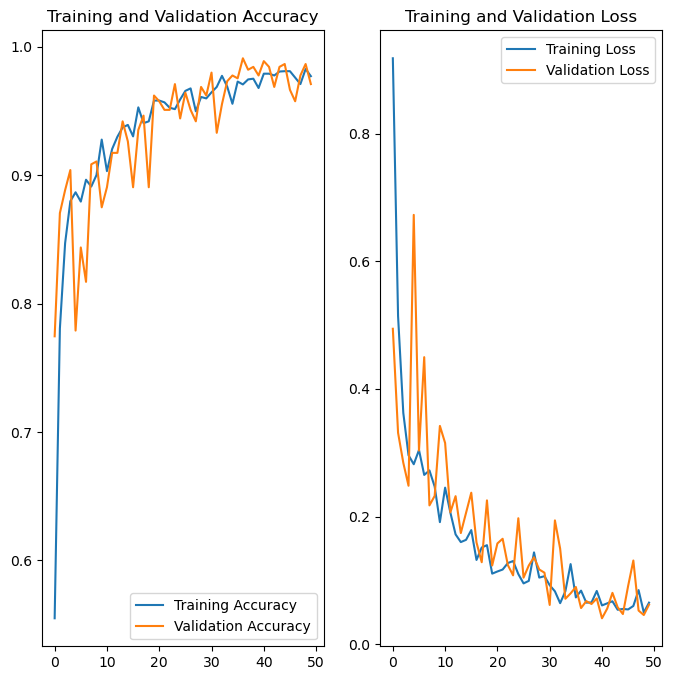

In [34]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Tomato_Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
predicted label: Tomato_Late_blight
first image to predict
actual label: Tomato_Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
predicted label: Tomato_Early_blight


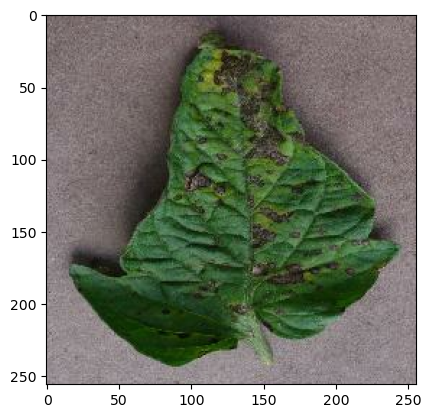

In [35]:
import numpy as np
for images_batch, labels_batch in test_ds.take(2):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [36]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [4]:
plt.figure(figsize=(13,13))
for images ,label in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[label[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}")
        
        plt.axis("off")

NameError: name 'test_ds' is not defined

<Figure size 1300x1300 with 0 Axes>

In [38]:
from tensorflow import keras
model.save('my_model.keras')


# Load the model

In [21]:
from tensorflow import keras
loaded_model = keras.models.load_model('disease_classification.keras')

C:\Users\SOUHA\.anaconda\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 18 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


# Test the model

In [22]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

first image to predict
actual label: Tomato_Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
predicted label: Tomato_Late_blight


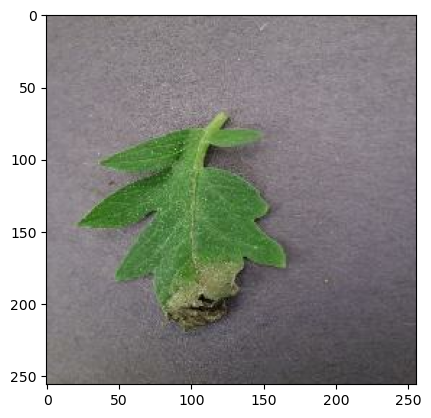

In [38]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = loaded_model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [16]:
import tensorflow as tf

# Créer un convertisseur pour le modèle chargé
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)

# (Optionnel) Activer l'optimisation pour réduire la taille du modèle
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Convertir le modèle
tflite_model = converter.convert()


INFO:tensorflow:Assets written to: C:\Users\SOUHA\AppData\Local\Temp\tmpfws5s3xr\assets


INFO:tensorflow:Assets written to: C:\Users\SOUHA\AppData\Local\Temp\tmpfws5s3xr\assets


Saved artifact at 'C:\Users\SOUHA\AppData\Local\Temp\tmpfws5s3xr'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(32, 256, 256, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(32, 3), dtype=tf.float32, name=None)
Captures:
  2963069069712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2963069069328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2963049689936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2963069071440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2963069066640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2963069069520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2963069070672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2963069072400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2963069071248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2963069073168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  29630690

In [9]:
# Sauvegarder le modèle TensorFlow Lite
with open('disease_classification.tflite', 'wb') as f:
    f.write(tflite_model)
